In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cp=pd.read_csv('cp.csv')
cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [3]:
cp

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


#features detail
1. N nitrogen ratio in the soil
2. K potassium ratio in the soil
3. P phosphurous ratio in the soil
4. Temperature in the Celsius 
5. humidity in the %
6. ph value in the soil
7. raonfall in the mm
8. label value as per the prediction

In [4]:
#printing of the labels
cp['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [5]:
X=cp.drop('label', axis=1)
y=cp['label']

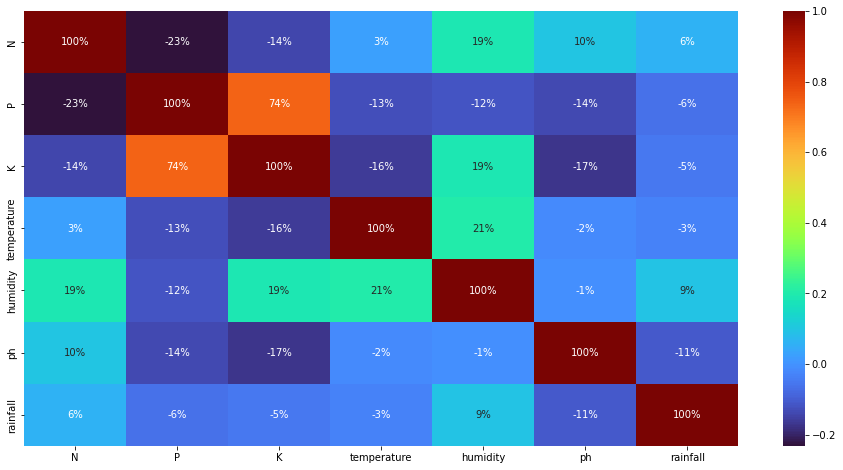

In [6]:
#maping of the heatmap
plt.figure(figsize=(16,8))
sns.heatmap(X.corr(), annot=True, cmap='turbo', fmt = '.0%')
plt.show()

<Figure size 1152x576 with 0 Axes>

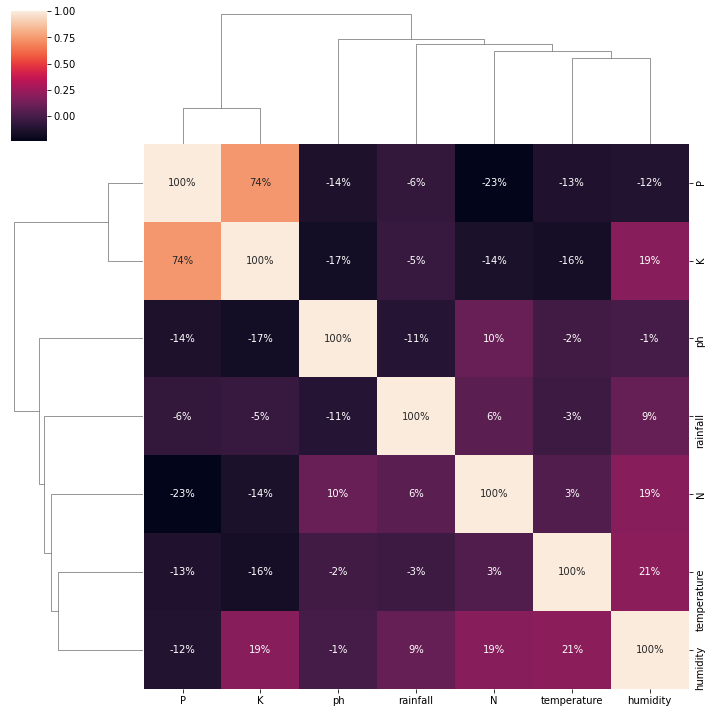

In [7]:
plt.figure(figsize=(16,8))
sns.clustermap(X.corr(), annot=True, fmt = '.0%')
plt.show()

In [8]:
# pd.DataFrame(index='index',
#             column =cp.drop())
cp.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [9]:
pd.pivot_table(cp,index='label', 
              columns=['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'])

label
apple
banana
blackgram
chickpea
coconut
coffee
cotton
grapes
jute
kidneybeans


In [10]:
from sklearn.model_selection import train_test_split


In [11]:
X_train, X_test, Y_train, Y_test=train_test_split(X,y,test_size=0.2, random_state=42)

In [12]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((1760, 7), (440, 7), (1760,), (440,))

In [13]:
# importing our models and metrics

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
import seaborn as sns

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

<h2> Logistic Regression </h2>

C:\Users\kunas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      0.95      0.98        22
   blackgram       0.75      0.83      0.79        18
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      0.94      0.97        18
      cotton       0.94      0.80      0.86        20
      grapes       1.00      1.00      1.00        14
        jute       0.87      0.91      0.89        22
 kidneybeans       0.95      1.00      0.97        19
      lentil       0.91      0.83      0.87        12
       maize       0.76      0.94      0.84        17
       mango       1.00      0.95      0.97        20
   mothbeans       0.92      0.85      0.88        26
    mungbean       1.00      0.95      0.97        20
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        14
      papaya       0.91    

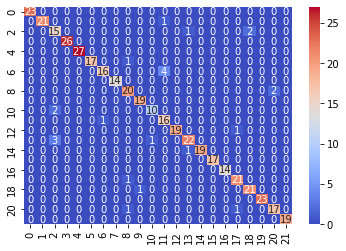

In [14]:
lg = LogisticRegression(random_state=10)
lg.fit(X_train, Y_train)
pred1 = lg.predict(X_test)

print(classification_report(pred1, Y_test), '\n')
print(sns.heatmap(confusion_matrix(pred1, Y_test), annot=True, cmap='coolwarm'), '\n')
print('Precision: ', precision_score(pred1, Y_test, average='macro'))
print('Accuracy: ', accuracy_score(pred1, Y_test))
print('Recall: ', recall_score(pred1, Y_test, average= 'macro'))
print('F1 Score: ', f1_score(pred1, Y_test, average= 'macro'))

<h2> Random Forest Classifier</h2>

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       1.00      0.92      0.96        25
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      1.00      1.00        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        14
      papaya       1.00    

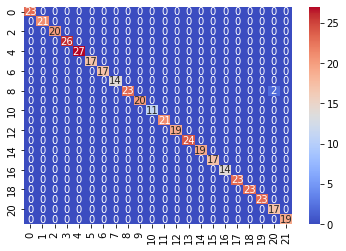

In [15]:
rf = RandomForestClassifier(random_state=10)
rf.fit(X_train, Y_train)
pred2 = rf.predict(X_test)

print(classification_report(pred2, Y_test), '\n')
sns.heatmap(confusion_matrix(pred2, Y_test), annot=True, cmap='coolwarm')

print('Precision: ', precision_score(pred2, Y_test, average='macro'))
print('Accuracy: ', accuracy_score(pred2, Y_test))
print('Recall: ', recall_score(pred2, Y_test, average='macro'))
print('F1 Score: ', f1_score(pred2, Y_test, average='macro'))

<h2> Decision Tree Classifier</h2>

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      0.95      0.98        21
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      0.96      0.98        28
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.87      0.91      0.89        22
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      0.92      0.96        12
       maize       0.95      1.00      0.98        20
       mango       1.00      1.00      1.00        19
   mothbeans       0.92      1.00      0.96        22
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        14
      papaya       1.00    

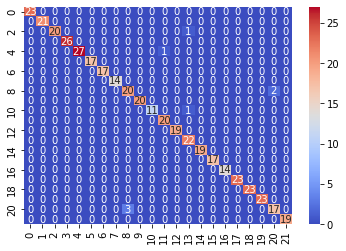

In [16]:
dt = DecisionTreeClassifier(random_state=10)
dt.fit(X_train, Y_train)
pred3 = dt.predict(X_test)

print(classification_report(pred3, Y_test), '\n')
sns.heatmap(confusion_matrix(pred3, Y_test), annot=True, cmap='coolwarm')

print('Precision: ', precision_score(pred3, Y_test, average='macro'))
print('Accuracy: ', accuracy_score(pred3, Y_test))
print('Recall: ', recall_score(pred3, Y_test, average='macro'))
print('F1 Score: ', f1_score(pred3, Y_test, average='macro'))

<h2> SVC</h2>

C:\Users\kunas\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kunas\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kunas\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       apple       0.00      0.00      0.00         0
      banana       0.00      0.00      0.00         0
   blackgram       0.00      0.00      0.00         0
    chickpea       0.00      0.00      0.00         0
     coconut       0.00      0.00      0.00         0
      coffee       0.00      0.00      0.00         0
      cotton       0.00      0.00      0.00         0
      grapes       0.00      0.00      0.00         0
        jute       0.00      0.00      0.00         0
 kidneybeans       0.00      0.00      0.00         0
      lentil       1.00      0.03      0.05       439
       maize       0.00      0.00      0.00         0
       mango       0.00      0.00      0.00         0
   mothbeans       0.00      0.00      0.00         0
    mungbean       0.00      0.00      0.00         0
   muskmelon       0.06      1.00      0.11         1
      orange       0.00      0.00      0.00         0
      papaya       0.00    

C:\Users\kunas\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


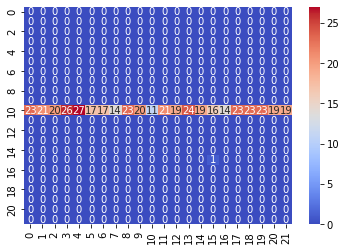

In [17]:
svc = SVC(C=1.2, class_weight=None, gamma=0.9, kernel='rbf')
svc.fit(X_train, Y_train)
pred4 = svc.predict(X_test)

print(classification_report(pred4, Y_test), '\n')
print(sns.heatmap(confusion_matrix(pred4, Y_test), annot=True, cmap='coolwarm'), '\n')
print('Precision: ', precision_score(pred4, Y_test, average='macro'))
print('Accuracy: ', accuracy_score(pred4, Y_test))
print('Recall: ', recall_score(pred4, Y_test, average= 'macro'))
print('F1 Score: ', f1_score(pred4, Y_test, average= 'macro'))

In [19]:
final_data=pd.DataFrame({'Models' : ['LR','RF','DT','SV'],
             "ACC" : [accuracy_score(Y_test,pred1)*100,
                      accuracy_score(Y_test,pred2)*100,
                      accuracy_score(Y_test,pred3)*100,
                      accuracy_score(Y_test,pred4)*100
                     ]})

In [20]:
final_data

,Models,ACC
0,LR,94.545455
1,RF,99.545455
2,DT,98.181818
3,SV,2.727273


C:\Users\kunas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Models', ylabel='ACC'>

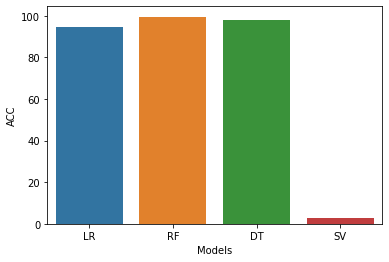

In [21]:
sns.barplot(final_data['Models'],final_data['ACC'])

In [22]:
y_pred=rf.predict(X_test)
y_pred

array(['muskmelon', 'watermelon', 'papaya', 'papaya', 'apple', 'mango',
       'apple', 'mothbeans', 'mungbean', 'lentil', 'blackgram', 'coconut',
       'pomegranate', 'jute', 'coconut', 'pomegranate', 'apple', 'maize',
       'papaya', 'muskmelon', 'coffee', 'papaya', 'orange', 'papaya',
       'chickpea', 'jute', 'mungbean', 'orange', 'pigeonpeas', 'rice',
       'pomegranate', 'mothbeans', 'jute', 'lentil', 'jute', 'blackgram',
       'jute', 'chickpea', 'chickpea', 'kidneybeans', 'papaya', 'mango',
       'blackgram', 'maize', 'mungbean', 'maize', 'pigeonpeas', 'coconut',
       'muskmelon', 'maize', 'blackgram', 'coffee', 'grapes', 'mungbean',
       'coffee', 'kidneybeans', 'cotton', 'apple', 'banana', 'blackgram',
       'watermelon', 'coconut', 'lentil', 'orange', 'papaya',
       'pigeonpeas', 'orange', 'rice', 'muskmelon', 'pigeonpeas',
       'muskmelon', 'coconut', 'jute', 'banana', 'blackgram', 'papaya',
       'banana', 'cotton', 'watermelon', 'orange', 'coffee', 'chickp

In [23]:
cp

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [24]:
import numpy as np
i = np.array([107, 34, 32, 26.774637, 66.413269, 6.780064, 177.774507]).reshape(1,-1)
i

array([[107.      ,  34.      ,  32.      ,  26.774637,  66.413269,
          6.780064, 177.774507]])

In [25]:
import numpy as np
i2 = np.array([17, 134, 367, 2.774637, 90.413269, 62.780064, 17.774507]).reshape(1,-1)
i2

array([[ 17.      , 134.      , 367.      ,   2.774637,  90.413269,
         62.780064,  17.774507]])

In [26]:
i

array([[107.      ,  34.      ,  32.      ,  26.774637,  66.413269,
          6.780064, 177.774507]])

In [27]:
y_pred=rf.predict(i2)
y_pred[0]

C:\Users\kunas\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


'grapes'

In [28]:
import pickle as pkl

In [29]:
pkl.dump(rf, open("rf.pkl", "wb"))

In [30]:
def pred(n,p,k,t,h,ph,rf):
            model=pkl.load(open('rf.pkl','rb'))
            return model.predict([[n,p,k,t,h,ph,rf]])[0]
        
ans = pred(1,1,1,1,1,1,1)

C:\Users\kunas\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [31]:
ans

'kidneybeans'